<a href="https://colab.research.google.com/github/Umesh9045/DataScienceBigDataAnalysit/blob/main/Datawrangling2_AcademicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Academic-Student.csv")
df

,rollno,marks,gender,age,phd
0,1,22.0,0,22.0,yes
1,2,45.0,0,23.0,no
2,3,66.0,0,NaN,no
3,4,77.0,0,34.0,NaN
4,5,33.0,0,22.0,no
...,...,...,...,...,...
95,96,15.0,0,23.0,yes
96,97,20.0,1,22.0,no
97,98,30.0,1,21.0,NaN
98,99,30.0,1,21.0,no


**Data Cleaning -> Replacing NaN value with Mean**

In [ ]:
df.isnull()

,rollno,marks,gender,age,phd
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,True,False
3,False,False,False,False,True
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,False,False
97,False,False,False,False,True
98,False,False,False,False,False


In [ ]:
df.isnull().sum()

rollno    0
marks     0
gender    0
age       5
phd       8
dtype: int64

In [ ]:
df.describe()

,rollno,marks,gender,age
count,100.000000,100.000000,100.000000,95.000000
mean,50.500000,29.560000,0.600000,23.126316
std,29.011492,14.864812,1.073087,1.891988
min,1.000000,11.000000,0.000000,21.000000
25%,25.750000,21.000000,0.000000,22.000000
50%,50.500000,25.500000,1.000000,23.000000
75%,75.250000,30.000000,1.000000,24.000000
max,100.000000,78.000000,10.000000,34.000000


In [ ]:
df['age'] = df['age'].replace(np.NaN, df['age'].mean())
df['age'][:10]

0    22.000000
1    23.000000
2    23.126316
3    34.000000
4    22.000000
5    21.000000
6    23.126316
7    24.000000
8    26.000000
9    21.000000
Name: age, dtype: float64

**Replacing unexpected/error value from 'phd' column with NULL**

In [ ]:
cnt = 0
for row in df['phd']:
  try:
    int(row)
    df.loc[cnt, 'phd'] = np.nan
  except ValueError:
      pass
  cnt+=1

In [ ]:
df['phd'][:10]

0    yes
1     no
2     no
3    NaN
4     no
5     no
6     no
7     no
8    yes
9    yes
Name: phd, dtype: object

In [ ]:
df['phd'].isnull().sum()

8

In [ ]:
df.dropna(inplace=True)
df['phd'].isnull().sum()

0

In [ ]:
df.isnull().sum()

rollno    0
marks     0
gender    0
age       0
phd       0
dtype: int64

# Detecting Outlier
**Inter Quantile Range (IQR)**

*75% - 25% values in a dataset*

**Steps:**
1. **Arrange the data increasing order**
2. **Calculate first(q1) quartile and third quartile(q3)**
3. **Find interqurtile range (q3-q1)**
4. **Find lower bound q1*1.5 and upper bound q2*1.5**

*1.5 value is based on distribution pattern and it is most proven value.
Anything that lies outside of lower and upper bound is an outlier*

In [ ]:
sorted_age = sorted(df['age'])
sorted_age

[21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.126315789473683,
 23.126315789473683,
 23.126315789473683,
 23.126315789473683,
 23.126315789473683,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 27.0]

In [ ]:
q1 = np.percentile(sorted_age, 25)
q2 = np.percentile(sorted_age, 75)
print(q1, q2)

22.0 24.0


In [ ]:
IQR = q2-q1
print(IQR)

9.25


In [ ]:
lwr_bound = q1-(1.5*IQR)
upr_bound = q2+(1.5*IQR)
print(lwr_bound, upr_bound)

6.875 43.875


In [ ]:
r_outliers = []
for i in sorted_age:
  if (i<lwr_bound or i>upr_bound):
    r_outliers.append(i)
print(r_outliers)

[]


**if there is outlier is present, then follwing technique is used to remove it**

In [ ]:
new_df = df
for i in r_outliers:
  new_df.drop(i, inplace=True)
new_df

,rollno,marks,gender,age,phd
0,1,22.0,0,22.000000,yes
1,2,45.0,0,23.000000,no
2,3,66.0,0,23.126316,no
4,5,33.0,0,22.000000,no
5,6,22.4,10,21.000000,no
...,...,...,...,...,...
93,94,17.0,0,25.000000,yes
95,96,15.0,0,23.000000,yes
96,97,20.0,1,22.000000,no
98,99,30.0,1,21.000000,no


***Data transformation* is the process of converting raw data into a format or structure that
would be more suitable for model building** 

<Axes: ylabel='Frequency'>

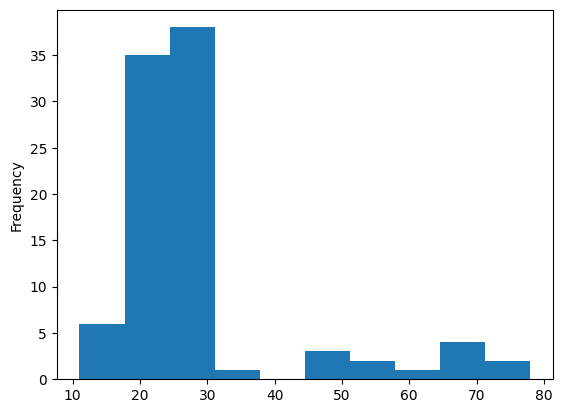

In [ ]:
new_df['marks'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

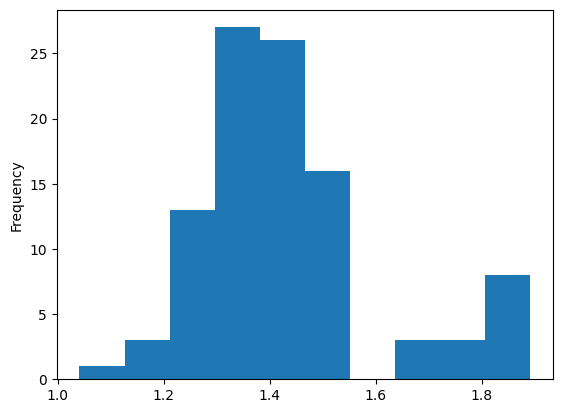

In [ ]:
#Convert the variables to logarithm at the scale 10.
df['log_marks'] = np.log10(df['marks'])

df['log_marks'].plot(kind = 'hist')

***It is observed that skewness is reduced at some level.***